In [35]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

 Part 1: Data Preprocessing and Exploratory Data Analysis (EDA)


In [36]:
# --- Part 1: Data Preprocessing  ---

# Step 1: Load data
data = pd.read_csv('Student_Performance.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)
print(data.shape)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

In [37]:
# Step 1b: Check and handle missing values
missing_percentage = data.isnull().mean() * 100
print("\nMissing Values (%):\n", missing_percentage)


Missing Values (%):
 Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64


In [38]:
# Step 2: Encode categorical variables
le = LabelEncoder()
data['Extracurricular Activities'] = le.fit_transform(data['Extracurricular Activities'])
print(data.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [39]:
# Step 3: Define features (X) and target (y)
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index']

In [40]:
# Step 4: Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Step 5: Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

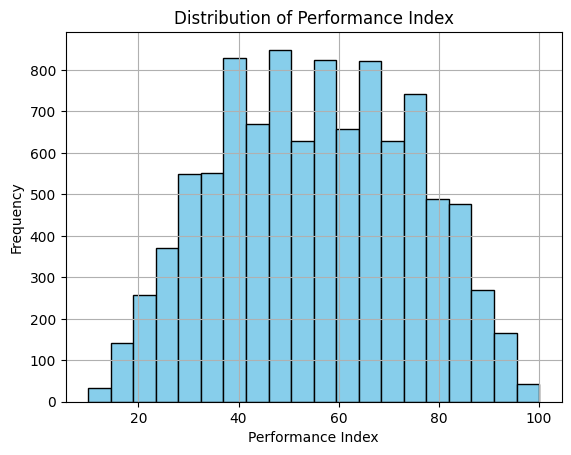

In [42]:

# --- Exploratory Data Analysis (EDA) ---

# Step 6: Visualize distribution of Performance Index
plt.hist(data['Performance Index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

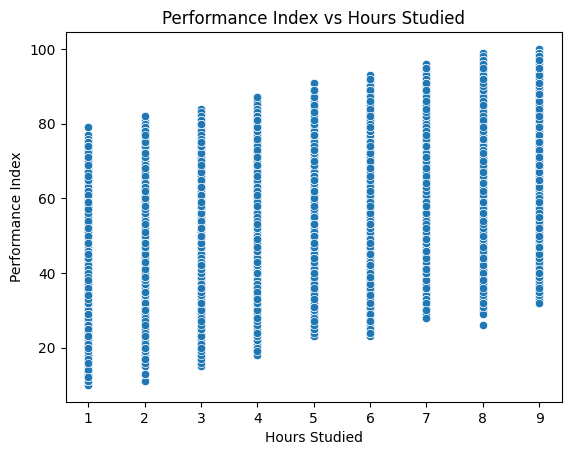

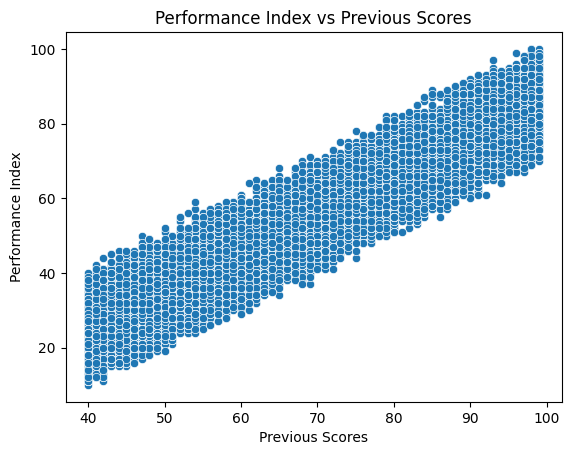

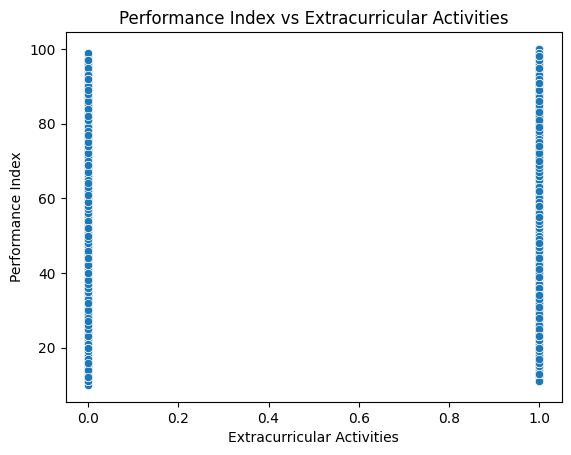

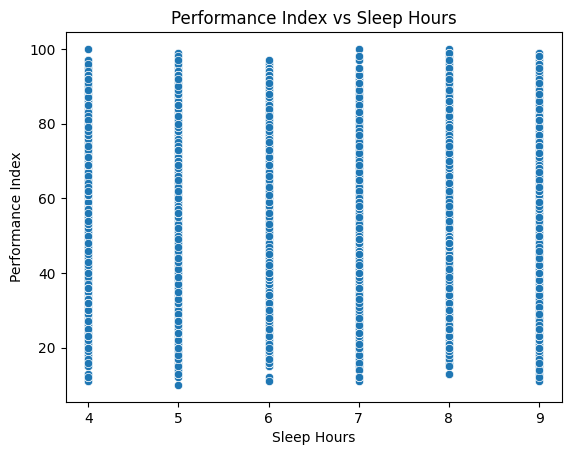

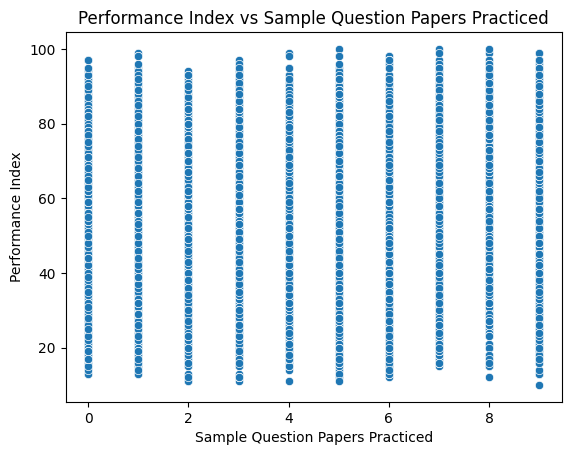

In [43]:
# Step 7: Scatter plots
independent_vars = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
for var in independent_vars:
    sns.scatterplot(data=data, x=var, y='Performance Index')
    plt.title(f'Performance Index vs {var}')
    plt.xlabel(var)
    plt.ylabel('Performance Index')
    plt.show()


Correlation with Performance Index:
 Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64


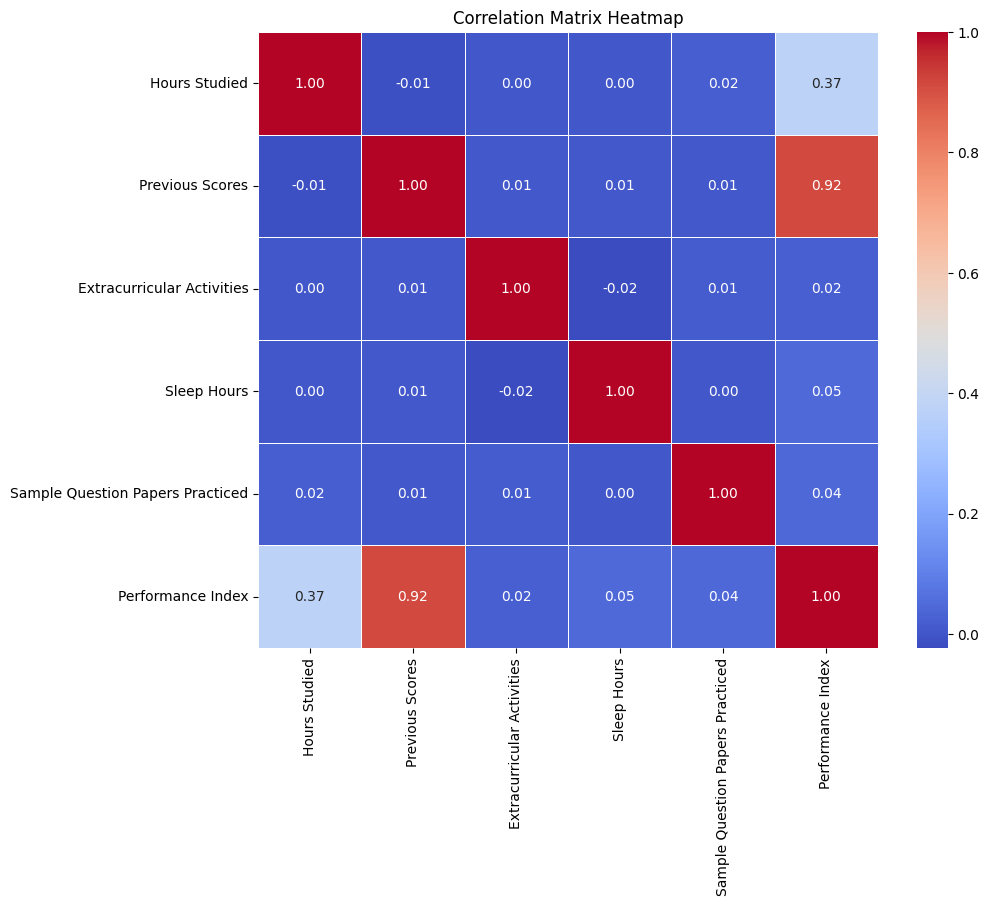

In [44]:
# Step 8: Correlation matrix and heatmap
corr_matrix = data.corr(numeric_only=True)
target_corr = corr_matrix['Performance Index'].sort_values(ascending=False)
print("\nCorrelation with Performance Index:\n", target_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Part 2: Linear Regression Model Implementation 

In [45]:
# --- Part 2: Linear Regression Model Implementation ---

# Step 9: Simple Linear Regression (Hours Studied vs Performance Index)

# Define for simple regression
X_simple = data[['Hours Studied']]
y_simple = data['Performance Index']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [46]:
# Scaling
scaler_simple = StandardScaler()
X_train_s_scaled = scaler_simple.fit_transform(X_train_s)
X_test_s_scaled = scaler_simple.transform(X_test_s)

In [47]:
# Train simple linear regression model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s_scaled, y_train_s)

LinearRegression()

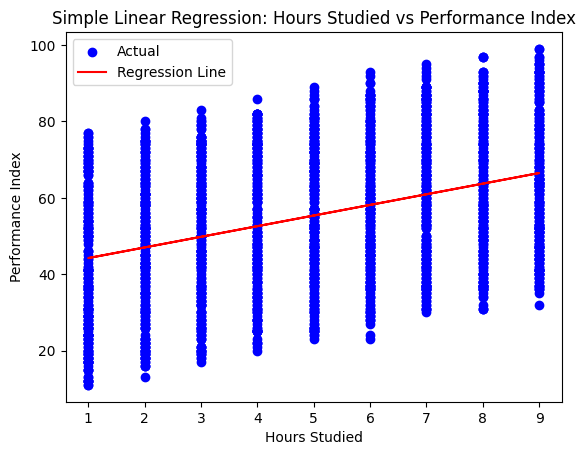

In [48]:
# Predict and plot
y_pred_simple = lr_simple.predict(X_test_s_scaled)

plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression: Hours Studied vs Performance Index')
plt.legend()
plt.show()

Multiple Linear Regression (All features)

In [49]:
# Step 10: Multiple Linear Regression (All features)

# Train multiple regression model
lr_multiple = LinearRegression()
lr_multiple.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
# Predict
y_pred_multiple = lr_multiple.predict(X_test_scaled)

In [51]:


# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_multiple.coef_})
print("\nMultiple Linear Regression Coefficients:\n", coefficients)


Multiple Linear Regression Coefficients:
                             Feature  Coefficient
0                     Hours Studied     7.401341
1                   Previous Scores    17.637271
2        Extracurricular Activities     0.304291
3                       Sleep Hours     0.810031
4  Sample Question Papers Practiced     0.548842


Part 3: Model Evaluation

In [52]:
# --- Part 3: Model Evaluation ---

# Step 11: Evaluation Metrics for Simple Linear Regression
mae_simple = mean_absolute_error(y_test_s, y_pred_simple)
mse_simple = mean_squared_error(y_test_s, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_s, y_pred_simple)
adjusted_r2_simple = 1 - (1 - r2_simple) * (len(y_test_s) - 1) / (len(y_test_s) - X_train_s.shape[1] - 1)

print("\nSimple Linear Regression Metrics:")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")
print(f"Adjusted R²: {adjusted_r2_simple:.4f}")



Simple Linear Regression Metrics:
MAE: 15.53
MSE: 321.81
RMSE: 17.94
R²: 0.1316
Adjusted R²: 0.1312


In [53]:
# Step 12: Evaluation Metrics for Multiple Linear Regression
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
adjusted_r2_multiple = 1 - (1 - r2_multiple) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)

print("\nMultiple Linear Regression Metrics:")
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"RMSE: {rmse_multiple:.2f}")
print(f"R²: {r2_multiple:.4f}")
print(f"Adjusted R²: {adjusted_r2_multiple:.4f}")


Multiple Linear Regression Metrics:
MAE: 1.61
MSE: 4.08
RMSE: 2.02
R²: 0.9890
Adjusted R²: 0.9890


Residual Analysis

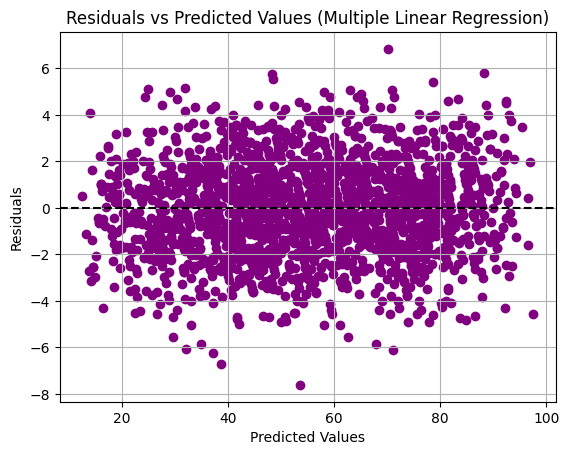

In [54]:
# --- Residual Analysis ---

# Step 13: Residuals calculation
residuals = y_test - y_pred_multiple

# Plot residuals
plt.scatter(y_pred_multiple, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values (Multiple Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

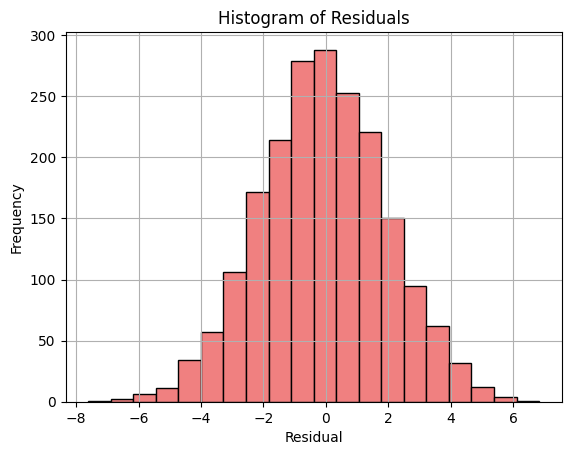

In [55]:
# Step 14: Check if residuals are normally distributed (Histogram + Q-Q Plot)
# Histogram
plt.hist(residuals, bins=20, edgecolor='black', color='lightcoral')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

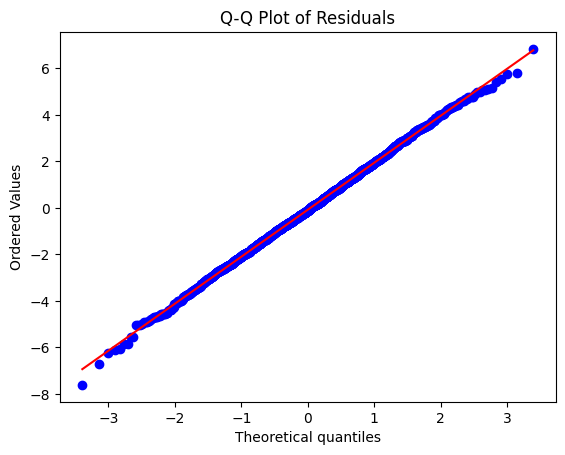

In [56]:




# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

3D Visualization with Multiple Linear Regression

In [57]:

# --- 3D Visualization (Optional Bonus) ---

# Step 15: 3D Regression Visualization with two features
X_3d = data[['Hours Studied', 'Previous Scores']]
y_3d = data['Performance Index']

X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_3d, y_3d, test_size=0.2, random_state=42)

scaler_3d = StandardScaler()
X_train_3d_scaled = scaler_3d.fit_transform(X_train_3d)
X_test_3d_scaled = scaler_3d.transform(X_test_3d)

lr_3d = LinearRegression()
lr_3d.fit(X_train_3d_scaled, y_train_3d)

hours = X_test_3d_scaled[:, 0]
previous_scores = X_test_3d_scaled[:, 1]
performance_index = y_test_3d

hours_range = np.linspace(hours.min(), hours.max(), 30)
previous_scores_range = np.linspace(previous_scores.min(), previous_scores.max(), 30)
hours_mesh, previous_scores_mesh = np.meshgrid(hours_range, previous_scores_range)

features_flat = np.vstack((hours_mesh.ravel(), previous_scores_mesh.ravel())).T
performance_pred_flat = lr_3d.predict(features_flat)
performance_pred_mesh = performance_pred_flat.reshape(hours_mesh.shape)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=hours, y=previous_scores, z=performance_index,
    mode='markers',
    marker=dict(size=6, color='blue', opacity=0.8),
    name='Actual Data'
))

fig.add_trace(go.Surface(
    x=hours_mesh, y=previous_scores_mesh, z=performance_pred_mesh,
    colorscale='Viridis',
    opacity=0.7,
    name='Regression Plane'
))

fig.update_layout(
    title="Multiple Linear Regression (3D View)",
    scene=dict(
        xaxis_title='Hours Studied ',
        yaxis_title='Previous Scores ',
        zaxis_title='Performance Index'
    )
)

fig.show()


Regularization Techniques with Cross-Validation

In [58]:
# --- 7. Regularization Techniques ---

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [59]:
# Step 1: Ridge Regression with Cross-Validation
ridge_alphas = np.logspace(-4, 4, 50)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_cv.predict(X_test_scaled)

print("\nBest Ridge alpha:", ridge_cv.alpha_)


Best Ridge alpha: 0.0001


In [60]:

# Step 2: Lasso Regression with Cross-Validation
lasso_alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=lasso_alphas, max_iter=10000, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test_scaled)

print("\nBest Lasso alpha:", lasso_cv.alpha_)


Best Lasso alpha: 0.00032374575428176434


In [61]:
# Step 3: Evaluation function
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")

In [62]:







# Step 4: Compare models
print("\nOriginal Multiple Linear Regression:")
evaluate_model("Multiple Linear Regression", y_test, y_pred_multiple)

print("\nRidge Regression:")
evaluate_model("Ridge Regression", y_test, y_pred_ridge)

print("\nLasso Regression:")
evaluate_model("Lasso Regression", y_test, y_pred_lasso)




Original Multiple Linear Regression:

Multiple Linear Regression Evaluation:
MAE: 1.61
MSE: 4.08
RMSE: 2.02
R²: 0.9890

Ridge Regression:

Ridge Regression Evaluation:
MAE: 1.61
MSE: 4.08
RMSE: 2.02
R²: 0.9890

Lasso Regression:

Lasso Regression Evaluation:
MAE: 1.61
MSE: 4.08
RMSE: 2.02
R²: 0.9890


Feature Importance using Lasso

In [63]:
# --- 8. Feature Importance using Lasso ---

# Step 5: Identify important features
lasso_coefficients = pd.Series(lasso_cv.coef_, index=X.columns)

In [64]:
# Sort by absolute coefficient value
important_features = lasso_coefficients.abs().sort_values(ascending=False)
top_3_features = important_features.head(3).index.tolist()

print("\nTop 3 Important Features from Lasso Regression:\n", top_3_features)


Top 3 Important Features from Lasso Regression:
 ['Previous Scores', 'Hours Studied', 'Sleep Hours']


In [65]:
# Step 6: Retrain using only top 3 features
X_train_top3 = X_train_scaled[:, [X.columns.get_loc(f) for f in top_3_features]]
X_test_top3 = X_test_scaled[:, [X.columns.get_loc(f) for f in top_3_features]]

In [66]:

# Train a new  model
from sklearn.linear_model import LinearRegression
lr_top3 = LinearRegression()
lr_top3.fit(X_train_top3, y_train)
y_pred_top3 = lr_top3.predict(X_test_top3)




In [67]:
# Step 7: Evaluate the model with top 3 features
print("\nModel Using Only Top 3 Features:")
evaluate_model("Top 3 Features Multipile Linear Regression", y_test, y_pred_top3)


Model Using Only Top 3 Features:

Top 3 Features Multipile Linear Regression Evaluation:
MAE: 1.70
MSE: 4.55
RMSE: 2.13
R²: 0.9877
